In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import os
from IPython.display import clear_output
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
root_path = 'drive/My Drive/'
file1 = root_path + '1_Handshaking_Handshaking_1_141.jpg'
file2 = root_path + '7_Cheering_Cheering_7_71.jpg'
file3 = root_path + '12_Group_Group_12_Group_Group_12_36.jpg'

In [0]:
def loadImages(root_path):
  '''Return a list with all image paths in the root_path'''
  image_files = sorted([os.path.join(root_path, file) for file in os.listdir(root_path) if file.endswith('.jpg')])
  return image_files

def return_one_face(image_path, x, y, w, h):
  img = cv2.imread(image_path,1)
  cropped_img = img[y:y+h, x:x+w]
  return cropped_img

def display_faces(image_path, people_info_raw_str, max_cols_to_display):
  info = people_info(people_info_raw_str)
  people_count = len(info)
  if people_count == 0:
    print('No People are good for displaying')
    return
  columns = max_cols_to_display if people_count>max_cols_to_display else people_count
  rows = math.ceil(people_count/columns)
  fig=plt.figure(figsize=(columns*3, rows*3))
  for i in range(people_count):
    x,y,w,h = info[i]
    img = return_one_face(image_path, x, y, w, h)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
  plt.show()

def people_info(raw_string):
  def is_valid_person(i):
    start_position = i*10
    return int(tmp[start_position+7]) == 0 and int(tmp[start_position+8]) == 0 and int(tmp[start_position+9]) == 0

  result = []
  tmp = raw_string.split()
  for i in range(int(len(tmp)/10)): # number of people
    if is_valid_person(i):
      start_position = i*10
      result.append([int(tmp[start_position]), int(tmp[start_position+1]), int(tmp[start_position+2]), int(tmp[start_position+3])])
  return result

In [0]:
info1 = '''
426 160 88 128 0 0 0 0 0 0 
644 150 98 146 0 0 0 0 0 0
'''

info2 = '''
621 465 51 59 0 0 0 0 0 0 
607 167 52 57 0 0 0 0 0 0 
707 38 55 64 0 0 0 0 0 0 
463 46 53 67 0 0 0 0 0 0 
468 237 48 67 0 0 0 0 0 0 
290 238 48 53 0 0 0 0 0 0 
271 80 49 64 0 0 0 0 0 0 
163 70 52 63 0 0 0 0 0 0
'''
info3 ='''
14 0 17 9 0 0 0 0 2 0 
131 0 15 9 1 0 0 0 2 0 
204 0 15 7 0 0 0 0 2 0 
269 0 18 15 1 0 0 0 1 0 
336 0 17 11 1 0 0 0 2 0 
6 20 19 27 1 0 0 0 0 0 
78 16 20 29 0 0 0 0 0 0 
147 28 17 26 0 0 0 0 0 0 
210 24 20 25 1 0 0 0 0 0 
272 30 18 22 1 1 0 0 1 0 
331 31 19 22 0 1 0 0 0 0 
403 12 19 24 1 0 0 0 0 0 
25 72 21 23 1 0 0 0 2 0 
89 68 20 28 0 0 0 0 0 0 
145 73 20 23 1 0 0 0 2 0 
224 71 23 29 0 0 0 0 0 0 
301 66 22 29 0 0 0 0 0 0 
373 65 20 32 0 0 0 0 0 0 
450 63 20 30 0 0 0 0 0 0 
425 127 20 25 0 0 0 0 1 0 
362 125 22 31 0 1 0 0 2 0 
286 121 21 28 0 1 0 0 0 0 
212 121 19 29 0 1 0 0 0 0 
149 124 20 28 0 1 0 0 1 0 
80 119 17 30 0 0 1 0 1 0 
106 171 20 25 0 1 0 0 0 0 
9 182 21 24 0 0 0 0 2 0 
32 239 22 33 0 1 0 0 0 0 
95 251 21 28 0 1 0 0 0 0 
155 226 22 34 0 1 0 0 0 0 
191 191 19 28 0 0 0 0 2 0 
272 172 21 34 0 0 1 0 0 0 
359 170 25 31 0 1 0 0 0 0 
447 173 21 28 0 1 0 0 1 0 
363 236 22 30 0 0 0 0 1 0 
303 254 25 30 0 1 0 0 2 0 
234 245 23 33 0 1 0 0 2 0 
173 294 24 29 0 1 0 0 0 0 
436 247 23 31 0 1 0 0 0 0 
27 320 23 29 0 0 0 0 2 0 
96 316 20 30 0 1 0 0 0 0 
258 316 28 33 0 1 0 0 0 0 
327 314 24 37 0 1 0 0 0 0 
413 311 25 41 0 1 0 0 0 0 
0 389 19 38 0 0 0 0 1 0 
71 387 26 35 0 1 0 0 0 0 
161 407 28 27 0 1 0 0 0 0 
243 380 31 40 0 0 0 0 0 0 
346 391 26 37 0 1 0 0 0 0 
417 402 25 38 0 1 0 0 0 0 
9 489 28 23 0 0 0 0 1 0 
88 475 32 37 0 1 0 0 0 0 
192 488 27 24 1 0 0 0 2 0 
296 493 29 19 1 0 0 0 2 0 
379 496 28 16 1 0 0 0 2 0 
460 484 29 28 0 0 0 0 1 0 
528 0 10 6 1 0 0 0 2 0 
578 0 16 16 1 0 0 0 0 0 
627 0 15 18 1 0 0 0 0 0 
747 0 17 9 1 0 0 0 2 0 
814 0 18 12 1 1 0 0 2 0 
892 0 15 11 1 1 0 0 2 0 
964 0 16 8 1 0 0 0 2 0 
574 30 17 21 1 0 0 0 0 0 
503 43 18 20 1 1 0 0 0 0 
528 65 20 27 1 0 0 0 0 0 
590 74 19 28 0 1 0 0 0 0 
635 31 21 22 2 1 0 0 0 0 
689 37 17 25 0 0 0 0 0 0 
745 28 16 23 1 0 0 0 2 0 
802 26 19 23 0 0 0 0 0 0 
860 28 20 28 0 1 0 0 0 0 
902 17 19 23 0 0 0 0 0 0 
973 33 17 23 0 1 0 0 0 0 
968 69 20 21 0 0 0 0 0 0 
902 80 18 25 0 0 0 0 0 0 
861 70 20 29 0 0 0 0 0 0 
783 79 20 23 1 0 0 0 2 0 
743 85 17 25 1 0 0 0 0 0 
671 71 21 30 0 0 0 0 0 0 
626 110 21 33 0 0 0 0 0 0 
550 131 19 20 1 0 0 0 0 0 
487 118 21 32 0 0 0 0 0 0 
695 123 23 30 0 0 0 0 0 0 
757 118 21 29 0 0 0 0 0 0 
828 125 20 27 0 1 0 0 0 0 
903 117 21 29 0 0 1 0 0 0 
980 127 23 27 0 0 0 0 0 0 
969 183 20 24 0 0 0 0 0 0 
898 167 21 40 0 0 0 0 2 0 
833 174 24 34 0 1 0 0 0 0 
762 179 20 29 0 1 0 0 0 0 
709 158 21 28 0 1 0 0 0 0 
639 179 21 29 0 1 0 0 0 0 
576 184 21 26 0 0 0 0 0 0 
515 187 21 20 1 0 0 0 2 0 
504 254 23 27 0 0 0 0 1 0 
573 230 25 33 0 0 0 0 0 0 
668 245 27 40 0 0 0 0 0 0 
760 246 20 26 0 0 0 0 0 0 
839 240 22 32 0 0 0 0 0 0 
935 239 25 37 0 1 0 0 0 0 
995 248 24 36 0 1 0 0 0 0 
942 328 23 30 0 0 0 0 0 0 
873 316 25 36 0 1 0 0 0 0 
1009 315 15 29 0 1 0 0 1 0 
793 326 24 30 0 1 0 0 0 0 
732 315 27 36 0 1 0 0 0 0 
645 318 25 33 0 1 0 0 1 0 
561 314 27 36 0 1 0 0 0 0 
493 322 23 33 1 0 0 0 1 0 
491 401 28 37 0 1 0 0 0 0 
557 408 22 28 0 0 0 0 1 0 
634 383 29 37 1 0 0 0 0 0 
707 403 28 39 1 0 0 0 0 0 
792 392 27 37 1 1 0 0 0 0 
880 396 28 41 0 1 0 0 0 0 
954 408 25 33 1 0 0 0 0 0 
987 488 30 24 1 0 0 0 0 0 
910 499 31 13 2 0 0 0 2 0 
818 487 28 25 0 1 0 0 0 0 
731 491 31 21 1 0 0 0 2 0 
647 488 28 24 1 0 0 0 2 0
'''

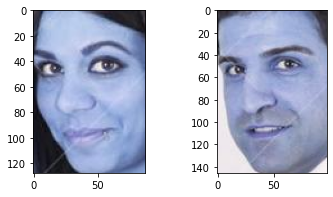

In [189]:
max_cols_to_display = 2
display_faces(file1, info1, max_cols_to_display)

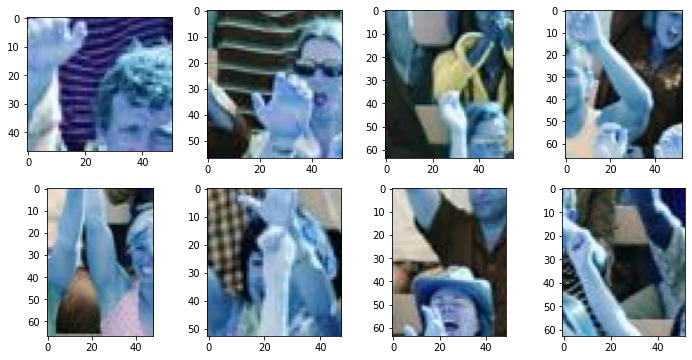

In [193]:
max_cols_to_display = 4
display_faces(file2, info2, max_cols_to_display)

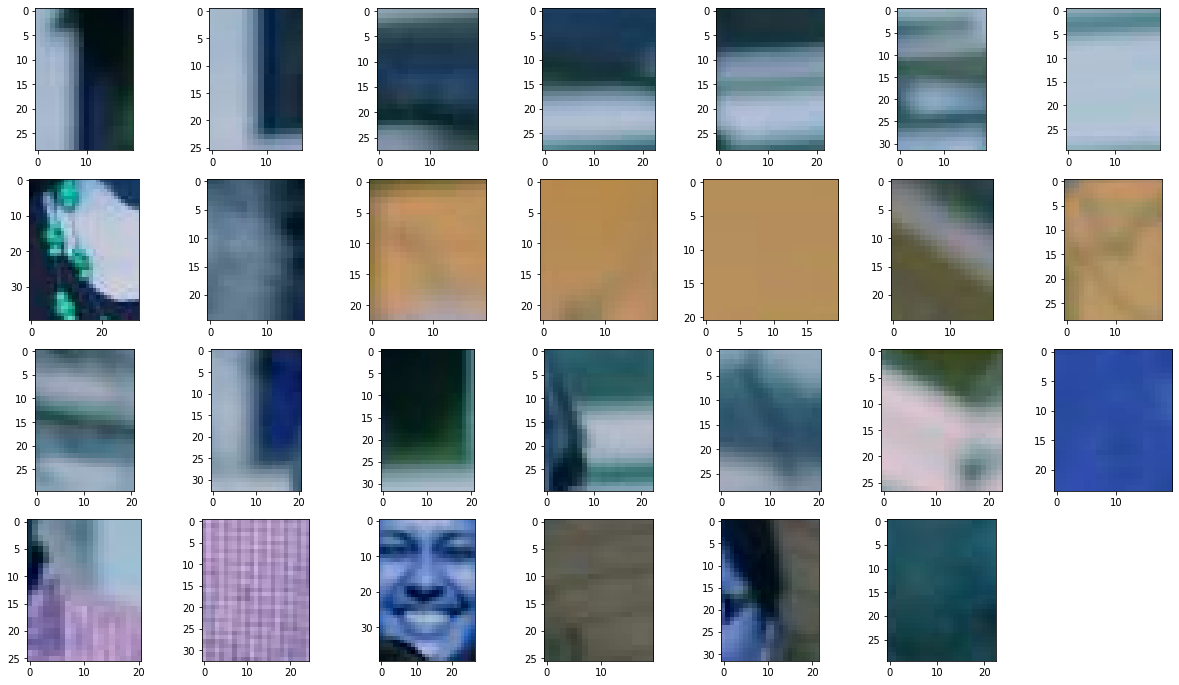

In [194]:
max_cols_to_display = 7
display_faces(file3, info3, max_cols_to_display)